In [1]:
import re
import nltk
import shap
import spacy
import transformers
#stopword removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#visualisation
from matplotlib import pyplot as plt
#local imports
from processing import process_data
from sentiment import sentiment_analysis, visualise_sentiments
from processing import process_data_to_list
from frequency_calculation import calculate_frequency_distribution

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luoya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
posts = process_data_to_list("data/posts", "content")
comms = process_data_to_list("data/comments", "body")
data = posts+comms

Processing complete. Total words and comments
Processing complete. Total words and comments


In [44]:
data = data[:60] + data[70:110]

<h2> Baseline Sentiment analysis scores </h2>

In [45]:
#this usually takes a while for all posts
scores_baseline = sentiment_analysis(data)

Post 1, sentiment: NEGATIVE, score: 0.99700
Post 2, sentiment: NEGATIVE, score: 0.99888
Post 3, sentiment: NEGATIVE, score: 0.98992
Post 4, sentiment: NEGATIVE, score: 0.99489
Post 5, sentiment: NEGATIVE, score: 0.99867
Post 6, sentiment: NEGATIVE, score: 0.99760
Post 7, sentiment: NEGATIVE, score: 0.97793
Post 8, sentiment: NEGATIVE, score: 0.98703
Post 9, sentiment: POSITIVE, score: 0.99540
Post 10, sentiment: NEGATIVE, score: 0.99825
Post 11, sentiment: POSITIVE, score: 0.96301
Post 12, sentiment: NEGATIVE, score: 0.99916
Post 13, sentiment: POSITIVE, score: 0.99646
Post 14, sentiment: NEGATIVE, score: 0.75171
Post 15, sentiment: NEGATIVE, score: 0.98736
Post 16, sentiment: NEGATIVE, score: 0.98222
Post 17, sentiment: NEGATIVE, score: 0.97155
Post 18, sentiment: POSITIVE, score: 0.99987
Post 19, sentiment: NEGATIVE, score: 0.96528
Post 20, sentiment: NEGATIVE, score: 0.98593
Post 21, sentiment: NEGATIVE, score: 0.86621
Post 22, sentiment: NEGATIVE, score: 0.99892
Post 23, sentiment:

In [46]:
#remove stopwords via nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
nltk_output = []

for item in data:
    word_tokens = word_tokenize(item)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    cleaned_sentence = " ".join(filtered_sentence)
    nltk_output.append(cleaned_sentence)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luoya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luoya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")
spacy_output = []
for item in data:
    doc = nlp(item)
    filtered_words = [token.text for token in doc if not token.is_stop]
    filtered_sentence = " ".join(filtered_words)
    spacy_output.append(filtered_sentence) 
# Join the filtered words to form a clean text
#clean_text = ' '.join(filtered_words)
 
#print("Text after Stopword Removal:", clean_text)
#print("Original Text:", text)

In [48]:
import string
def load_stopwords(filepath):
    with open(filepath, 'r') as file:
        stopwords = set(file.read().split())
    return stopwords

def filter_text(text, stopwords):
    words = text.split()
    text = text.translate(str.maketrans('', '', string.punctuation))
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

stopwords_1 = load_stopwords('data/Stopwords.txt')
stopwords_2 = load_stopwords('data/StopwordsNoise.txt')
stopwords_1 = set(word.strip(",'[]") for word in stopwords_1)
stopwords_2 = set(word.strip(",'[]") for word in stopwords_2)

filtered_texts1 = [filter_text(text, stopwords_1) for text in data]
filtered_texts2 = [filter_text(text, stopwords_2) for text in data]

In [49]:
original_scores = scores_baseline #change this later
nltk_scores = sentiment_analysis(nltk_output)
spacy_scores = sentiment_analysis(spacy_output)
stop1_scores = sentiment_analysis(filtered_texts1)
stop2_scores = sentiment_analysis(filtered_texts2)

Post 1, sentiment: NEGATIVE, score: 0.99861
Post 2, sentiment: NEGATIVE, score: 0.99900
Post 3, sentiment: NEGATIVE, score: 0.99506
Post 4, sentiment: NEGATIVE, score: 0.99889
Post 5, sentiment: NEGATIVE, score: 0.99703
Post 6, sentiment: NEGATIVE, score: 0.99594
Post 7, sentiment: NEGATIVE, score: 0.96510
Post 8, sentiment: NEGATIVE, score: 0.99551
Post 9, sentiment: POSITIVE, score: 0.96890
Post 10, sentiment: NEGATIVE, score: 0.99560
Post 11, sentiment: NEGATIVE, score: 0.64377
Post 12, sentiment: NEGATIVE, score: 0.99594
Post 13, sentiment: POSITIVE, score: 0.98447
Post 14, sentiment: NEGATIVE, score: 0.99432
Post 15, sentiment: NEGATIVE, score: 0.98265
Post 16, sentiment: NEGATIVE, score: 0.97602
Post 17, sentiment: NEGATIVE, score: 0.96377
Post 18, sentiment: POSITIVE, score: 0.99987
Post 19, sentiment: NEGATIVE, score: 0.98920
Post 20, sentiment: NEGATIVE, score: 0.96263
Post 21, sentiment: NEGATIVE, score: 0.99178
Post 22, sentiment: NEGATIVE, score: 0.99792
Post 23, sentiment:

Post 84, sentiment: NEGATIVE, score: 0.94517
Post 85, sentiment: NEGATIVE, score: 0.99740
Post 86, sentiment: POSITIVE, score: 0.99886
Post 87, sentiment: NEGATIVE, score: 0.96754
Post 88, sentiment: POSITIVE, score: 0.99412
Post 89, sentiment: NEGATIVE, score: 0.96323
Post 90, sentiment: NEGATIVE, score: 0.99291
Post 91, sentiment: NEGATIVE, score: 0.95253
Post 92, sentiment: NEGATIVE, score: 0.98161
Post 93, sentiment: POSITIVE, score: 0.74812
Post 94, sentiment: POSITIVE, score: 0.99580
Post 95, sentiment: NEGATIVE, score: 0.99208
Post 96, sentiment: POSITIVE, score: 0.72800
Post 97, sentiment: NEGATIVE, score: 0.99307
Post 98, sentiment: NEGATIVE, score: 0.99737
Post 99, sentiment: NEGATIVE, score: 0.99139
Post 100, sentiment: POSITIVE, score: 0.99710
Post 1, sentiment: NEGATIVE, score: 0.99825
Post 2, sentiment: NEGATIVE, score: 0.99835
Post 3, sentiment: NEGATIVE, score: 0.97190
Post 4, sentiment: NEGATIVE, score: 0.99871
Post 5, sentiment: NEGATIVE, score: 0.99736
Post 6, sentim

Post 67, sentiment: NEGATIVE, score: 0.98058
Post 68, sentiment: NEGATIVE, score: 0.99285
Post 69, sentiment: NEGATIVE, score: 0.98200
Post 70, sentiment: NEGATIVE, score: 0.99882
Post 71, sentiment: POSITIVE, score: 0.74812
Post 72, sentiment: POSITIVE, score: 0.74812
Post 73, sentiment: NEGATIVE, score: 0.98343
Post 74, sentiment: POSITIVE, score: 0.95866
Post 75, sentiment: NEGATIVE, score: 0.99976
Post 76, sentiment: NEGATIVE, score: 0.97559
Post 77, sentiment: POSITIVE, score: 0.97920
Post 78, sentiment: POSITIVE, score: 0.74812
Post 79, sentiment: POSITIVE, score: 0.85322
Post 80, sentiment: NEGATIVE, score: 0.97747
Post 81, sentiment: POSITIVE, score: 0.85300
Post 82, sentiment: NEGATIVE, score: 0.99941
Post 83, sentiment: NEGATIVE, score: 0.99536
Post 84, sentiment: NEGATIVE, score: 0.89301
Post 85, sentiment: NEGATIVE, score: 0.94804
Post 86, sentiment: POSITIVE, score: 0.96346
Post 87, sentiment: NEGATIVE, score: 0.99931
Post 88, sentiment: POSITIVE, score: 0.99412
Post 89, s

In [50]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Function to compute cosine similarity between two lists
def compute_similarity(list1, list2):
    # Ensure the lists are in array form and reshape for cosine_similarity function
    vector1 = np.array(list1).reshape(1, -1)
    vector2 = np.array(list2).reshape(1, -1)
    return cosine_similarity(vector1, vector2)[0][0]

similarity_nltk = compute_similarity(original_scores, nltk_scores)
similarity_spacy = compute_similarity(original_scores, spacy_scores)
similartiy_stopword1 = compute_similarity(original_scores, stop1_scores)
similartiy_stopword2 = compute_similarity(original_scores, stop2_scores)
print(f"Cosine Similarity with NLTK: {similarity_nltk}")
print(f"Cosine Similarity with spaCy: {similarity_spacy}")
print(f"Cosine Similarity with Stopword1: {similartiy_stopword1}")
print(f"Cosine Similarity with Stopword2: {similartiy_stopword2}")

Cosine Similarity with NLTK: 0.690039118006026
Cosine Similarity with spaCy: 0.6095092971747607
Cosine Similarity with Stopword1: 0.7323591854460543
Cosine Similarity with Stopword2: 0.7053495307247001


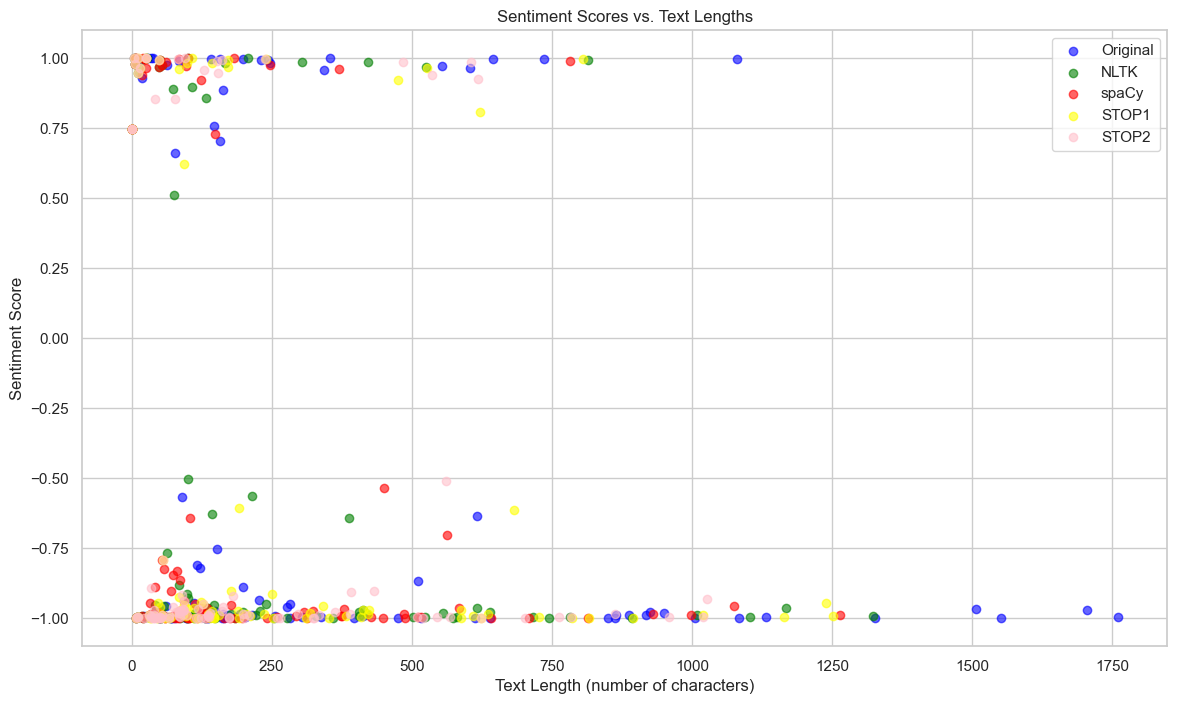

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
original_lengths = [len(text) for text in data]
nltk_lengths = [len(text) for text in nltk_output]
spacy_lengths = [len(text) for text in spacy_output]
stop1_lengths = [len(text) for text in filtered_texts1]
stop2_lengths = [len(text) for text in filtered_texts2]

sns.set(style="whitegrid", context="notebook")

# Create the scatter plot
plt.figure(figsize=(14, 8))
plt.scatter(original_lengths, original_scores, color='blue', alpha=0.6, label='Original')
plt.scatter(nltk_lengths, nltk_scores, color='green', alpha=0.6, label='NLTK')
plt.scatter(spacy_lengths, spacy_scores, color='red', alpha=0.6, label='spaCy')
plt.scatter(stop1_lengths, stop1_scores, color='yellow', alpha=0.6, label='STOP1')
plt.scatter(stop2_lengths, stop2_scores, color='pink', alpha=0.6, label='STOP2')
plt.title('Sentiment Scores vs. Text Lengths')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

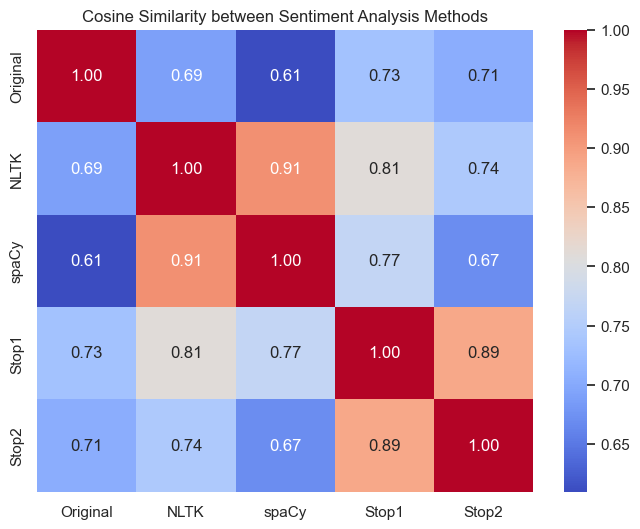

In [52]:
# Calculate similarities
similarity_nltk = compute_similarity(original_scores, nltk_scores)
similarity_spacy = compute_similarity(original_scores, spacy_scores)
similarity_stop1 = compute_similarity(original_scores, stop1_scores)
similarity_stop2 = compute_similarity(original_scores, stop2_scores)

similarity_nltk_spacy = compute_similarity(nltk_scores, spacy_scores)
similarity_nltk_stop1 = compute_similarity(nltk_scores, stop1_scores)
similarity_nltk_stop2 = compute_similarity(nltk_scores, stop2_scores)

similarity_spacy_stop1 = compute_similarity(spacy_scores, stop1_scores)
similarity_spacy_stop2 = compute_similarity(spacy_scores, stop2_scores)

similarity_stop1_stop2 = compute_similarity(stop1_scores, stop2_scores)

# Prepare the similarity matrix
similarity_matrix = np.array([
    [1, similarity_nltk, similarity_spacy, similartiy_stopword1, similartiy_stopword2],          # Similarity with original
    [similarity_nltk, 1, similarity_nltk_spacy, similarity_nltk_stop1, similarity_nltk_stop2],     # Similarity between nltk and others
    [similarity_spacy, similarity_nltk_spacy, 1, similarity_spacy_stop1, similarity_spacy_stop2],     # Similarity between spacy and others
    [similartiy_stopword1, similarity_nltk_stop1, similarity_spacy_stop1, 1, similarity_stop1_stop2],
    [similartiy_stopword2, similarity_nltk_stop2, similarity_spacy_stop2, similarity_stop1_stop2, 1],
])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Original', 'NLTK', 'spaCy','Stop1','Stop2'],
            yticklabels=['Original', 'NLTK', 'spaCy', 'Stop1', 'Stop2'])
plt.title('Cosine Similarity between Sentiment Analysis Methods')
plt.show()